## Análisis Exploratorio de Datos - Atributos demográficos

Se importan las librerías.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

Montamos el acceso a Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_X = pd.read_csv("/content/drive/MyDrive/proyecto PPP/Datos/Bases unidas/Datasets EDA v2/df_X_con_NA_crudo.csv")
data_X.head()

año  family id  family member id                           organisation  \
0  2021     6378.0            7546.0  ChCC-Municipalidad de Alto del Carmen   
1  2021     6378.0            7547.0  ChCC-Municipalidad de Alto del Carmen   
2  2021     6379.0            7548.0  ChCC-Municipalidad de Alto del Carmen   
3  2021     6379.0            7549.0  ChCC-Municipalidad de Alto del Carmen   
4  2021     6380.0            7550.0  ChCC-Municipalidad de Alto del Carmen   

                   practitioner noinhousehold  \
0  karolriveragajardo@gmail.com             3   
1  karolriveragajardo@gmail.com             3   
2  karolriveragajardo@gmail.com             4   
3  karolriveragajardo@gmail.com             4   
4  karolriveragajardo@gmail.com             4   

                                         dd  \
0                Desorden de salud mental,    
1                Desorden de salud mental,    
2  Condición o impedimento motor (físico),    
3  Condición o impedimento motor (físico),    
4                                       NaN   

                                           household            income  \
0                                                NaN  $20001 to $30000   
1                                                NaN  $20001 to $30000   
2  Familia nuclear viviendo con familia extensa (...   Menos de $20000   
3  Familia nuclear viviendo con familia extensa (...   Menos de $20000   
4  Familia nuclear viviendo con familia extensa (...  $20001 to $30000   

   postal  ...        employment horas institucion marital status  \
0  165000  ...     Media jornada    22          No    Conviviente   
1  165000  ...  Jornada complete    44          No    Conviviente   
2  165000  ...     Media jornada    22          Sí    Conviviente   
3  165000  ...  Jornada complete    44          Sí    Conviviente   
4  165000  ...  Jornada complete    44          No       Casado/a   

                    relationship seek professional seek professional partner  \
0  Madre -- biológica o adoptiva               NaN        Otro profesional,    
1  Padre -- biológico o adoptivo               NaN                       NaN   
2  Madre -- biológica o adoptiva               NaN                       NaN   
3  Padre -- biológico o adoptivo               NaN                       NaN   
4  Madre -- biológica o adoptiva               NaN                       NaN   

  programa nivel rango etario  
0     ChCC    AP          012  
1     ChCC    AP          012  
2     ChCC    AP          012  
3     ChCC    AP          012  
4     ChCC    AP          012  

[5 rows x 24 columns]

In [ ]:
# Tamaño del dataset
data_X.shape

(7657, 24)

In [ ]:
# Información general del dataset
data_X.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        7657 non-null   int64  
 1   family id                  7656 non-null   float64
 2   family member id           7656 non-null   float64
 3   organisation               7656 non-null   object 
 4   practitioner               7656 non-null   object 
 5   noinhousehold              6674 non-null   object 
 6   dd                         1257 non-null   object 
 7   household                  4480 non-null   object 
 8   income                     4542 non-null   object 
 9   postal                     1719 non-null   object 
 10  edad                       7195 non-null   object 
 11  género                     7459 non-null   object 
 12  beneficio                  6279 non-null   object 
 13  education                  7656 non-null   objec

In [ ]:
# Pasar cada columna a su tipo correcto

# noinhousehold
data_X["noinhousehold"] = data_X["noinhousehold"].apply(pd.to_numeric, errors="coerce")
data_X["horas"] = data_X["horas"].apply(pd.to_numeric, errors="coerce")

data_X.loc[data_X["household"] == "Familia nuclear (padre o madre biol√≥gico o adoptivo)", "household"] = "Familia nuclear (padre o madre biológico o adoptivo)"

data_X = pd.concat(
    [
        data_X.select_dtypes([], ["object"]),
        data_X.select_dtypes(["object"]).apply(pd.Series.astype, dtype="category"),
    ],
    axis=1,
)

In [ ]:
# Estadística descriptiva de los atributos numéricos
data_X[["año", "noinhousehold"]].describe().round(2)

año  noinhousehold
count  7657.00        6599.00
mean   2021.21           4.26
std       0.91           1.74
min    2019.00           0.00
25%    2021.00           3.00
50%    2021.00           4.00
75%    2022.00           5.00
max    2022.00          73.00

In [ ]:
# Valores nulos
data_X.isna().sum()

año                             0
family id                       1
family member id                1
noinhousehold                1058
horas                        4381
organisation                    1
practitioner                    1
dd                           6400
household                    3177
income                       3115
postal                       5938
edad                          462
género                        198
beneficio                    1378
education                       1
employment                      1
institucion                  1612
marital status                735
relationship                  131
seek professional            5698
seek professional partner    7157
programa                        0
nivel                           0
rango etario                    0
dtype: int64

In [ ]:
data_na = data_X.isna().melt(value_name="Tipo de dato")
data_na.loc[data_na["Tipo de dato"] == True, "Tipo de dato"] = "Nulo"
data_na.loc[data_na["Tipo de dato"] == False, "Tipo de dato"] = "Completo"

<Figure size 1000x600 with 0 Axes>

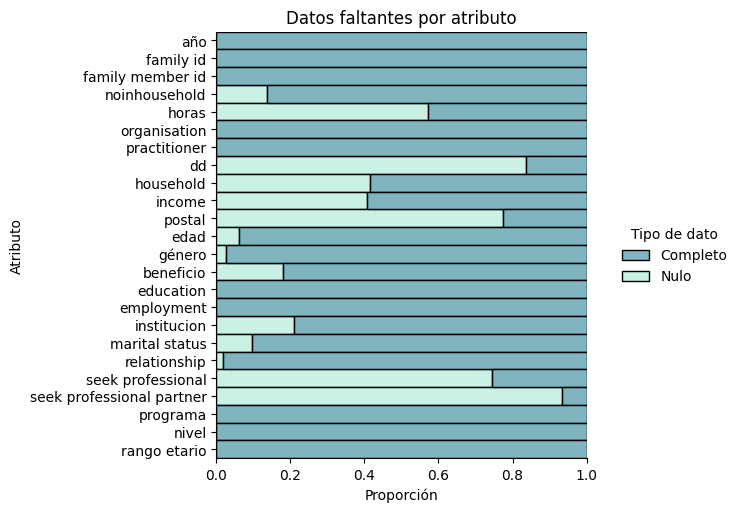

In [ ]:
plt.figure(figsize=(10,6))
chart = sns.displot(
    data=data_na,
    y="variable",
    hue="Tipo de dato",
    multiple="fill",
    aspect=1.25,
    palette=['#569DAA',"#B9EDDD"]
)
plt.xlabel("Proporción")
plt.ylabel("Atributo")
plt.title("Datos faltantes por atributo")
plt.show()

In [ ]:
# Presencia de duplicados
data_X.duplicated().any()

False

### Visualizaciones y métricas exploratorias

In [ ]:
# Año
plt.figure(figsize=(10, 5))
chart = sns.countplot(x='año', data=data_X, palette=["#648FFF"])
chart.set_title("Cantidad de datos por año")
chart.set_xlabel("Año")
chart.set_ylabel("Cantidad")

# display counts above bars
for p in chart.patches:
    chart.annotate(f"{p.get_height()}",
                   (p.get_x() + p.get_width() / 2.,
                    p.get_height()),
                   ha='center',
                   va='center',
                   fontsize=10,
                   color='gray',
                   xytext=(0, 5),
                   textcoords='offset points')


plt.show()

Ver datos nulos por año. Tener el contraste de datos útiles.

In [ ]:
# Cantidad de familias
family_u = data_X["family id"].nunique()
print(f"Cantidad de familias: {family_u}")

Cantidad de familias: 7093


In [ ]:
# ver si es mejor piechart o de barra
data_X.groupby(['programa', "nivel", "rango etario"]).count().reset_index()[['programa', "nivel", "rango etario", "family id"]]

programa nivel rango etario  family id
0      ChCC    AP          012       2600
1      ChCC    AP        mixto          0
2      ChCC    AP         teen          0
3      ChCC    GR          012       2271
4      ChCC    GR        mixto          0
5      ChCC    GR         teen          0
6      ChCC    NC          012          0
7      ChCC    NC        mixto        139
8      ChCC    NC         teen          0
9      ChCC   STD          012        725
10     ChCC   STD        mixto          0
11     ChCC   STD         teen          0
12    Lazos    AP          012        234
13    Lazos    AP        mixto          0
14    Lazos    AP         teen       1056
15    Lazos    GR          012        184
16    Lazos    GR        mixto          0
17    Lazos    GR         teen        447
18    Lazos    NC          012          0
19    Lazos    NC        mixto          0
20    Lazos    NC         teen          0
21    Lazos   STD          012          0
22    Lazos   STD        mixto          0
23    Lazos   STD         teen          0

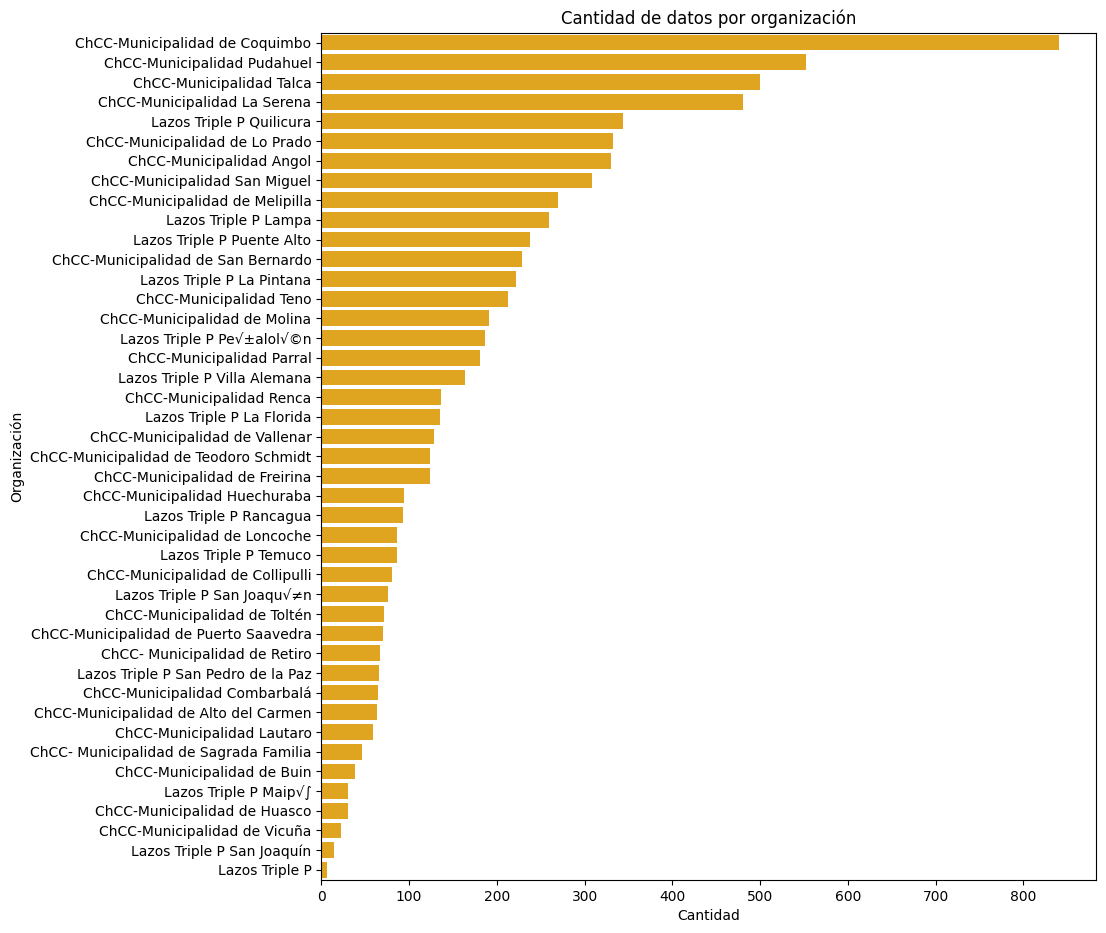

In [ ]:
# Organización
plt.figure(figsize=(10, 11))
chart = sns.countplot(y='organisation', data=data_X, order = data_X['organisation'].value_counts().index, palette=["#FFB000"])
chart.set_title("Cantidad de datos por organización")
chart.set_xlabel("Cantidad")
chart.set_ylabel("Organización")

plt.show()

In [ ]:

practitioner_u = data_X["organisation"].nunique()
print(f"Cantidad de organizaciones: {practitioner_u}")

Cantidad de organizaciones: 43


In [ ]:
# Facilitadores
practitioner_u = data_X["practitioner"].nunique()
print(f"Cantidad de facilitadores: {practitioner_u}")

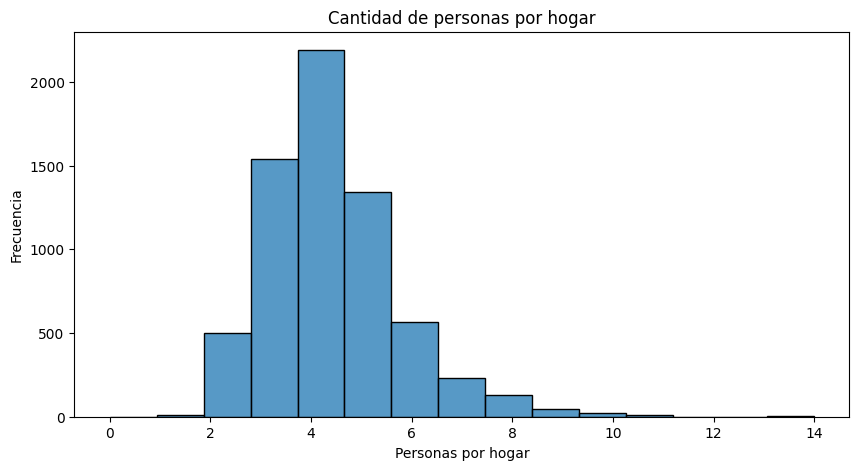

In [ ]:
# Personas en el grupo familiar
plt.figure(figsize=(10, 5))
chart = sns.histplot(data=data_X.loc[data_X["noinhousehold"] < 20], x="noinhousehold", bins=15)
chart.set_title("Cantidad de personas por hogar")
chart.set_xlabel("Personas por hogar")
chart.set_ylabel("Frecuencia")
plt.show()

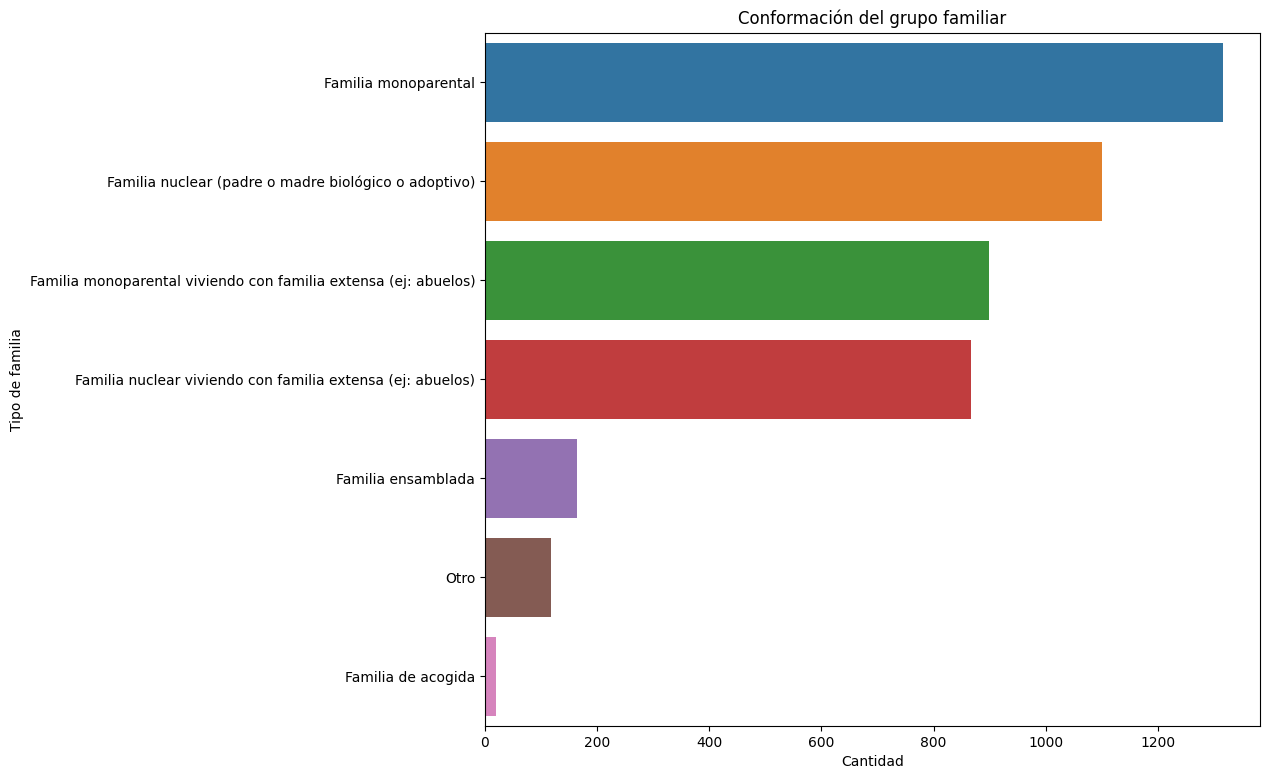

In [ ]:
# Conformación del grupo familiar
plt.figure(figsize=(10, 9))
chart = sns.countplot(y='household', data=data_X, order = data_X['household'].value_counts().index)
chart.set_title("Conformación del grupo familiar")
chart.set_xlabel("Cantidad")
chart.set_ylabel("Tipo de familia")

plt.show()

In [ ]:
# Ingresos per cápita
plt.figure(figsize=(10, 6))
chart = sns.countplot(x='income', data=data_X, order = data_X['income'].value_counts().index, palette=["#009E73"])
chart.set_title("Ingresos per cápita del hogar")
chart.set_xlabel("Ingresos [CLP]")
chart.set_ylabel("Frecuencia")
plt.xticks(rotation=45)

plt.show()

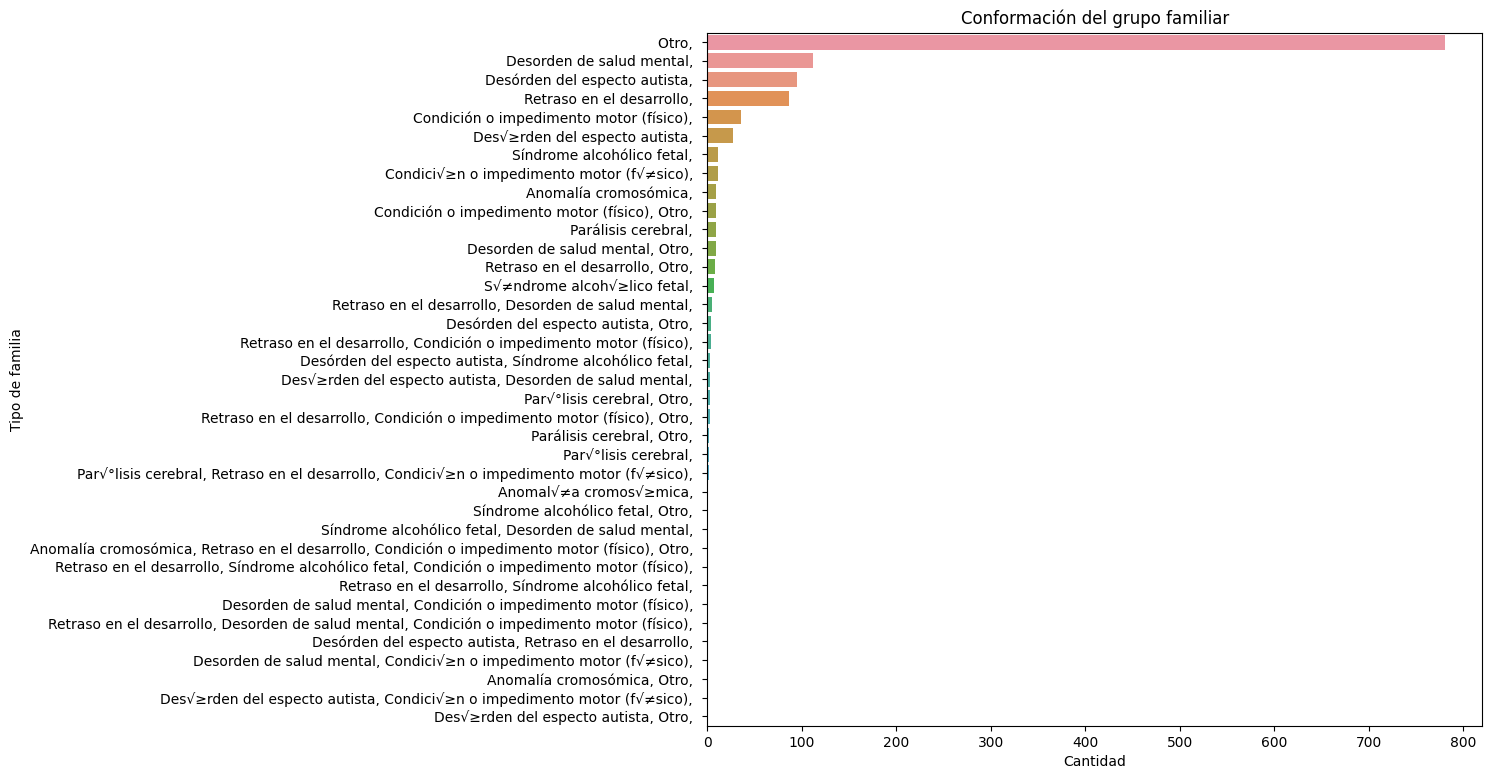

In [ ]:
# Diagnóstico
plt.figure(figsize=(10, 9))
chart = sns.countplot(y='dd', data=data_X, order = data_X['dd'].value_counts().index)
chart.set_title("Conformación del grupo familiar")
chart.set_xlabel("Cantidad")
chart.set_ylabel("Tipo de familia")

plt.show()

In [ ]:
# Edad
plt.figure(figsize=(10, 9))
chart = sns.countplot(x='edad', data=data_X, order = data_X['edad'].value_counts().index)
chart.set_title("Edad")
chart.set_xlabel("Cantidad")
chart.set_ylabel("Tipo de familia")

plt.show()

In [ ]:
# Género
chart = data_X.groupby(['género']).count().plot(kind='pie',
                                              y="family id",
                                              autopct='%.2f%%',
                                              title="Proporción de cuidadores",
                                              figsize=(8, 6))
chart.set_xlabel(" ")
chart.set_ylabel(" ")
plt.show()

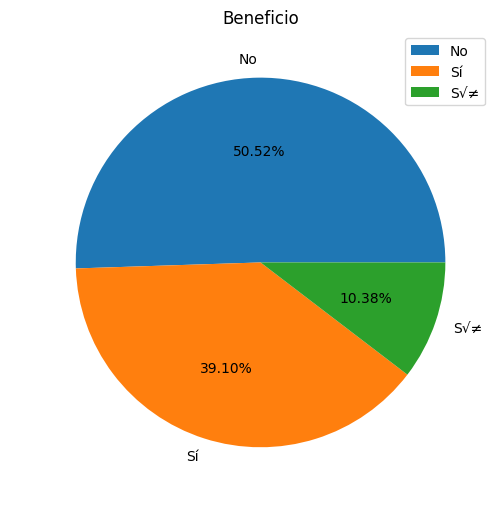

In [ ]:
# Beneficio
chart = data_X.groupby(['beneficio']).count().plot(kind='pie',
                                              y="family id",
                                              autopct='%.2f%%',
                                              title="Beneficio",
                                              figsize=(8, 6))
chart.set_xlabel(" ")
chart.set_ylabel(" ")
plt.show()

In [ ]:
# Educación
plt.figure(figsize=(10, 9))
chart = sns.countplot(y='education', data=data_X, order = data_X['education'].value_counts().index)
chart.set_title("Educación")
chart.set_xlabel("Cantidad")
chart.set_ylabel("Tipo de familia")

plt.show()

In [ ]:
# Personas en el grupo familiar
plt.figure(figsize=(10, 5))
chart = sns.histplot(data=data_X, x="horas", bins=30)
chart.set_title("Histograma de la edad de los empleados")
chart.set_xlabel("Edad")
chart.set_ylabel("Frecuencia")
plt.show()

In [ ]:
data_X["institucion"]

In [ ]:
# Marital status
plt.figure(figsize=(10, 9))
chart = sns.countplot(y='marital status', data=data_X, order = data_X['marital status'].value_counts().index)
chart.set_title("Educación")
chart.set_xlabel("Cantidad")
chart.set_ylabel("Tipo de familia")

plt.show()

In [ ]:
# Relationship
plt.figure(figsize=(10, 9))
chart = sns.countplot(y='relationship', data=data_X, order = data_X['relationship'].value_counts().index)
chart.set_title("Relación del cuidador")
chart.set_xlabel("Cantidad")
chart.set_ylabel("Tipo de familia")

plt.show()

In [ ]:
# Marital status
plt.figure(figsize=(10, 9))
chart = sns.countplot(y='seek professional', data=data_X, order = data_X['seek professional'].value_counts().index)
chart.set_title("Educación")
chart.set_xlabel("Cantidad")
chart.set_ylabel("Tipo de familia")

plt.show()

### Análisis multivariado


Genero, edad y marital status

In [ ]:
plt.figure(figsize=(10, 5))
chart = sns.countplot(x='edad', hue='género', palette=['#FE6100',"#648FFF"], data=data_X)
chart.set_title("Género y edades de los cuidadores")
chart.set_xlabel("Rango etario")
chart.set_ylabel("Frecuencia")
chart.legend(title='Género')

plt.show()

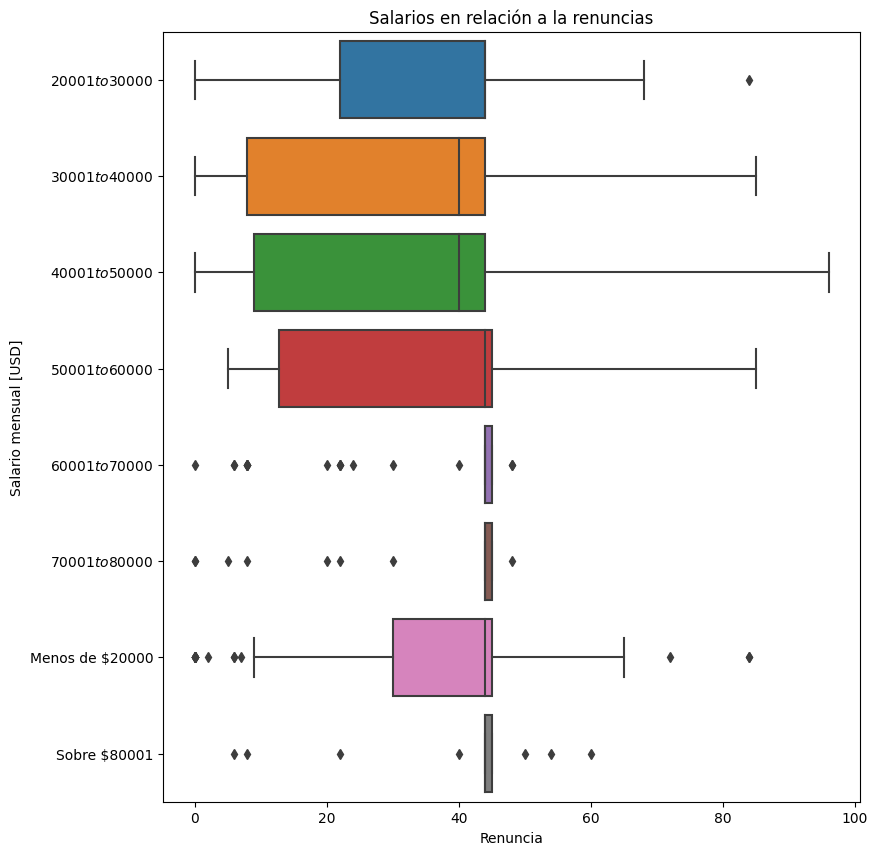

In [ ]:
# horas y salario
plt.figure(figsize=(9, 10))
chart = sns.boxplot(data=data_X, x="horas", y="income")
chart.set_title("Salarios en relación a la renuncias")
chart.set_xlabel("Renuncia")
chart.set_ylabel("Salario mensual [USD]")
plt.show()

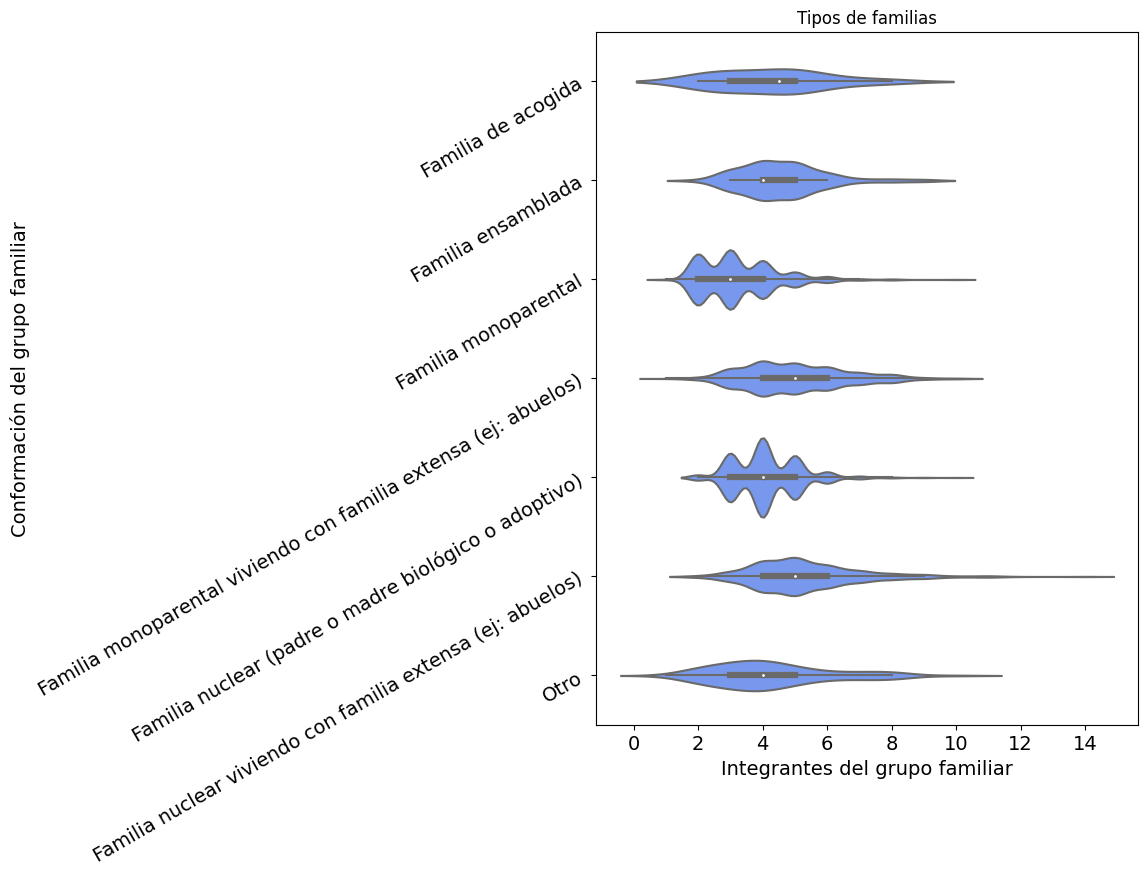

In [ ]:
# horas y salario
plt.figure(figsize=(7, 9))
chart = sns.violinplot(data=data_X.loc[(data_X["noinhousehold"]>0) & (data_X["noinhousehold"]<20)], x="noinhousehold", y="household", palette=["#648FFF"])
chart.set_title("Tipos de familias")
chart.set_xlabel("Integrantes del grupo familiar", fontsize=14)
chart.set_ylabel("Conformación del grupo familiar", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks(rotation=30)
plt.show()

In [ ]:
l= data_X["household"].unique()
for i in l:
  print(i)

nan
Familia nuclear viviendo con familia extensa (ej: abuelos)
Familia monoparental
Familia nuclear (padre o madre biológico o adoptivo)
Familia monoparental viviendo con familia extensa (ej: abuelos)
Familia ensamblada
Familia de acogida
Otro
Familia nuclear (padre o madre biol√≥gico o adoptivo)


In [ ]:
data_X.loc[data_X["household"] == "Familia nuclear (padre o madre biol√≥gico o adoptivo)", "household"] = "Familia nuclear (padre o madre biologico o adoptivo)"

TypeError: ignored

In [ ]:
data_X.loc[data_X["household"] == "Familia nuclear (padre o madre biol√≥gico o adoptivo)", "household"]

Series([], Name: household, dtype: category
Categories (8, object): ['Familia de acogida', 'Familia ensamblada', 'Familia monoparental',
                         'Familia monoparental viviendo con familia ext..., 'Familia nuclear (padre o madre biológico o ad...,
                         'Familia nuclear (padre o madre biol√≥gico o a..., 'Familia nuclear viviendo con familia extensa ...,
                         'Otro'])

Text(0, 0.5, 'Frecuencia')

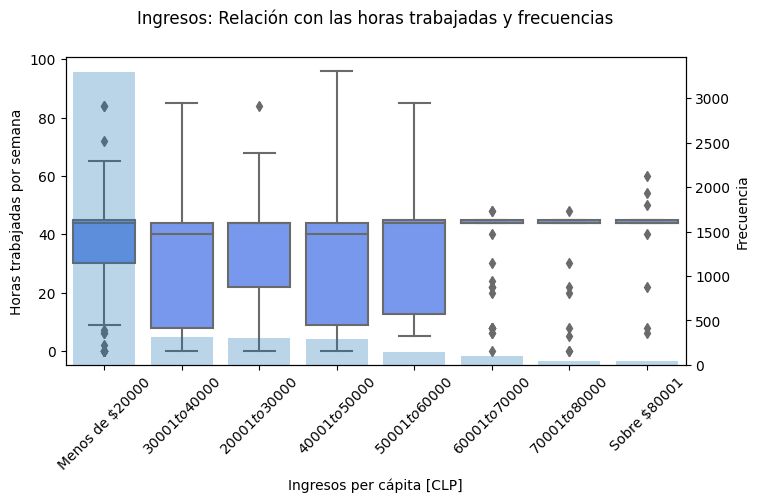

In [ ]:
columns_my_order = ['Menos de $20000', '$20001 to $30000', '$30001 to $40000', '$40001 to $50000', '$50001 to $60000', '$60001 to $70000', '$70001 to $80000', 'Sobre $80001']

df = data_X.copy()

fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(data_X, x='income', y="horas", ax=ax, order = data_X['income'].value_counts().index, palette=["#648FFF"])

ax.set_xlabel('Ingresos per cápita [CLP]')
ax.set_ylabel('Horas trabajadas por semana')

plt.title("Ingresos: Relación con las horas trabajadas y frecuencias", y=1.08)
plt.xticks(rotation=45)

ax2 = ax.twinx()

df_income = df.set_index("income").loc[columns_my_order].groupby(["income"]).count().reset_index()[["income", "family id"]].sort_values(by=['family id'], ascending=False)

ax2.bar(range(0, len(df_income['income'])), height=df_income["family id"], align='center', alpha=0.3)

ax2.set_ylabel('Frecuencia')


In [ ]:
df_income

income  family id
6   Menos de $20000       3301
1  $30001 to $40000        315
0  $20001 to $30000        308
2  $40001 to $50000        289
3  $50001 to $60000        140
4  $60001 to $70000        103
5  $70001 to $80000         45
7      Sobre $80001         41

In [ ]:
# wordcloud de conformacion de los hogares
data_household_wc = data_X.groupby(["household"]).count().reset_index()[["household", "family id"]]

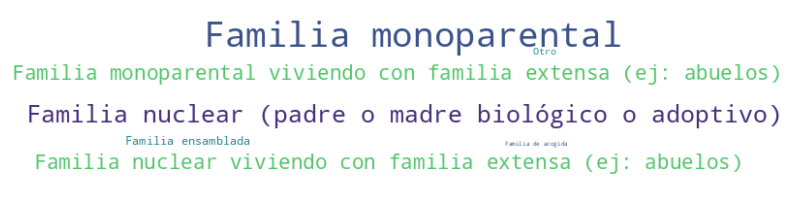

In [ ]:
# method 2: convert to dict
data_household_wcd = data_household_wc.set_index('household').to_dict()['family id']

wc = WordCloud(background_color='white', width=800, height=200, max_words=200).generate_from_frequencies(data_household_wcd)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data_household_wcd

{19: 'Familia de acogida',
 164: 'Familia ensamblada',
 1316: 'Familia monoparental',
 898: 'Familia monoparental viviendo con familia extensa (ej: abuelos)',
 853: 'Familia nuclear (padre o madre biológico o adoptivo)',
 247: 'Familia nuclear (padre o madre biol√≥gico o adoptivo)',
 866: 'Familia nuclear viviendo con familia extensa (ej: abuelos)',
 117: 'Otro'}